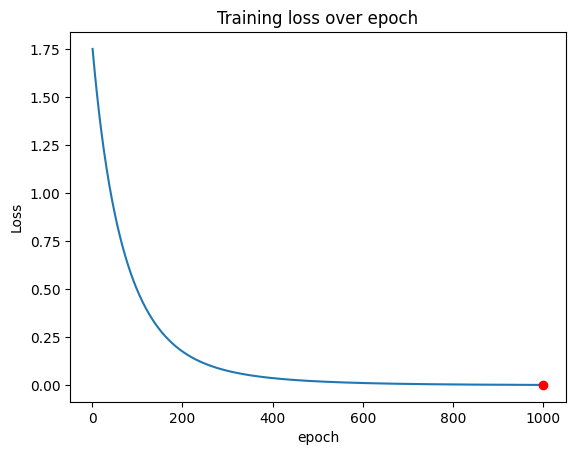

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

batch_size = 32
sequence_length = 100
num_features = 10
num_output_units = 1

# defining the input and output sequence
x = np.random.rand(batch_size, sequence_length, num_features)
y = np.random.rand(batch_size, sequence_length, num_output_units)

#setting up the rnn-architecture and defining the parameters
num_hidden_units = 64
num_output_units = 1
rnn_cell = tf.keras.layers.SimpleRNNCell(num_hidden_units)
output_layer = tf.keras.layers.Dense(num_output_units, activation = 'linear')
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)

#define the input and output sequence
x = tf.random.normal([batch_size, sequence_length, num_features])
y = tf.random.normal([batch_size, sequence_length, num_output_units])

#define the cost function
def mean_squared_error(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))

#defining the training loop
@tf.function
def train_step(x, y):
  with tf.GradientTape() as tape:
    hidden_state = rnn_cell.get_initial_state(x)
    for t in range(sequence_length):
      output, hidden_state = rnn_cell(x[:, t, :], hidden_state)
      output = output_layer(output)
      loss = mean_squared_error(y[:, t, :], output)
    grads = tape.gradient(loss, rnn_cell.trainable_variables + output_layer.trainable_variables)
    optimizer.apply_gradients(zip(grads, rnn_cell.trainable_variables + output_layer.trainable_variables))
    return loss

num_epochs = 1000

#creating a tensorflor data dataset object
dataset = tf.data.Dataset.from_tensor_slices((x, y))


# Create a tensorflow data dataset object with the specified batch size
dataset = tf.data.Dataset.from_tensor_slices((x, y)).batch(batch_size)

# Train the rnn
loss_history = []
for epoch in range(num_epochs):
  for batch_x, batch_y in dataset:
    loss = train_step(batch_x, batch_y)
  loss_history.append(loss)

#get the weights of the trained rnn model
rnn_weight = rnn_cell.get_weights()
output_weights = output_layer.get_weights()

#find the index of the minimum loss in the loss history
min_loss_index = loss_history.index(min(loss_history))

#plot the cost function with the minimum weight
plt.plot(range(1, num_epochs+1), loss_history)
plt.plot(min_loss_index + 1, loss_history[min_loss_index], 'ro')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.title("Training loss over epoch")
plt.show()

#authors : Baibhav Barwal, Steve Nguyen, Atharv Tekurkar, Janak Subedi